In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
df = pd.read_csv('/content/OCD Patient Dataset_ Demographics & Clinical Data (1).csv')

In [14]:
df.head()   # Display the first few rows of the dataset

,Patient ID,Age,Gender,Ethnicity,Marital Status,Education Level,OCD Diagnosis Date,Duration of Symptoms (months),Previous Diagnoses,Family History of OCD,Obsession Type,Compulsion Type,Y-BOCS Score (Obsessions),Y-BOCS Score (Compulsions),Depression Diagnosis,Anxiety Diagnosis,Medications
0,1018,32,Female,African,Single,Some College,2016-07-15,203,MDD,No,Harm-related,Checking,17,10,Yes,Yes,SNRI
1,2406,69,Male,African,Divorced,Some College,2017-04-28,180,NaN,Yes,Harm-related,Washing,21,25,Yes,Yes,SSRI
2,1188,57,Male,Hispanic,Divorced,College Degree,2018-02-02,173,MDD,No,Contamination,Checking,3,4,No,No,Benzodiazepine
3,6200,27,Female,Hispanic,Married,College Degree,2014-08-25,126,PTSD,Yes,Symmetry,Washing,14,28,Yes,Yes,SSRI
4,5824,56,Female,Hispanic,Married,High School,2022-02-20,168,PTSD,Yes,Hoarding,Ordering,39,18,No,No,NaN


In [ ]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=df)

https://docs.google.com/spreadsheets/d/1flIXkaAq_xnzoNlaiAPZh0pvvCDLBhlA5DpE0a3Z7w4#gid=0


/usr/local/lib/python3.10/dist-packages/google/colab/sheets.py:31: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return frame.applymap(_clean_val).replace({np.nan: None})


In [ ]:
df.info()    #summary of the datasets

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Patient ID                     1500 non-null   int64 
 1   Age                            1500 non-null   int64 
 2   Gender                         1500 non-null   object
 3   Ethnicity                      1500 non-null   object
 4   Marital Status                 1500 non-null   object
 5   Education Level                1500 non-null   object
 6   OCD Diagnosis Date             1500 non-null   object
 7   Duration of Symptoms (months)  1500 non-null   int64 
 8   Previous Diagnoses             1252 non-null   object
 9   Family History of OCD          1500 non-null   object
 10  Obsession Type                 1500 non-null   object
 11  Compulsion Type                1500 non-null   object
 12  Y-BOCS Score (Obsessions)      1500 non-null   int64 
 13  Y-B

In [ ]:
df.describe()  #summary of the datasets for numarical coumns

,Patient ID,Age,Duration of Symptoms (months),Y-BOCS Score (Obsessions),Y-BOCS Score (Compulsions)
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.00000
mean,5541.254000,46.781333,121.745333,20.048000,19.62600
std,2562.389469,16.830321,67.404610,11.823884,11.78287
min,1017.000000,18.000000,6.000000,0.000000,0.00000
25%,3338.000000,32.000000,64.000000,10.000000,9.00000
50%,5539.500000,47.000000,121.000000,20.000000,20.00000
75%,7745.500000,61.000000,178.000000,31.000000,29.00000
max,9995.000000,75.000000,240.000000,40.000000,40.00000


In [12]:
df.isnull().sum() # Checking for missing values

,0
Patient ID,0
Age,0
Gender,0
Ethnicity,0
Marital Status,0
Education Level,0
OCD Diagnosis Date,0
Duration of Symptoms (months),0
Previous Diagnoses,248
Family History of OCD,0


In [ ]:
df.describe(include=('O'))  # Summary statistics for categorical columns

,Gender,Ethnicity,Marital Status,Education Level,OCD Diagnosis Date,Previous Diagnoses,Family History of OCD,Obsession Type,Compulsion Type,Depression Diagnosis,Anxiety Diagnosis,Medications
count,1500,1500,1500,1500,1500,1252,1500,1500,1500,1500,1500,1114
unique,2,4,3,4,1218,4,2,5,5,2,2,3
top,Male,Caucasian,Single,Some College,2017-06-21,MDD,Yes,Harm-related,Washing,Yes,Yes,Benzodiazepine
freq,753,398,511,394,4,345,760,333,321,772,751,386


In [ ]:
df['Gender'].value_counts()                   # Summary of categorical data
df['Ethnicity'].value_counts()
df['Marital Status'].value_counts()

,count
Marital Status,
Single,511
Married,507
Divorced,482


Step 4: Visualizing Demographic Data
Create visualizations to explore the demographic data (Age, Gender, Ethnicity,
etc.)

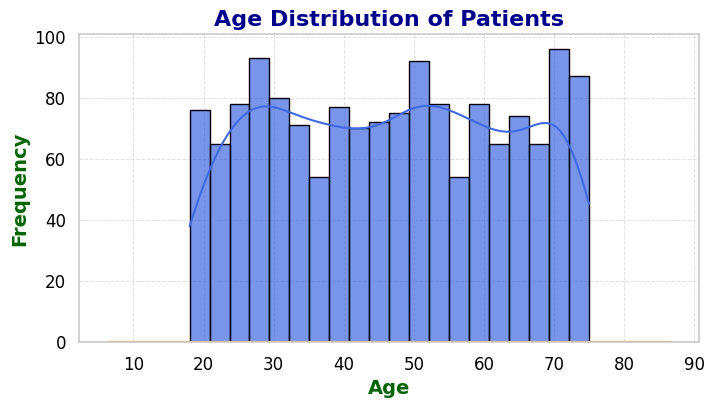

In [105]:
#age distribution
plt.figure(figsize=(8, 4))
# Creating the histogram with an added color gradient and transparency (alpha)
sns.histplot(df['Age'], bins=20, kde=True, color='royalblue', alpha=0.7, edgecolor='black')
# Adding a color for the KDE line (Kernel Density Estimate)
sns.kdeplot(df['Age'], color='darkorange', linewidth=2)
# Adding a grid to the background for better readability
plt.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.6)
plt.title('Age Distribution of Patients', fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel('Age', fontsize=14, fontweight='bold', color='darkgreen')
plt.ylabel('Frequency', fontsize=14, fontweight='bold', color='darkgreen')
# Customizing tick labels
plt.xticks(fontsize=12, color='black')
plt.yticks(fontsize=12, color='black')
plt.show()

<ipython-input-28-a089db0112c9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Gender', palette='coolwarm')


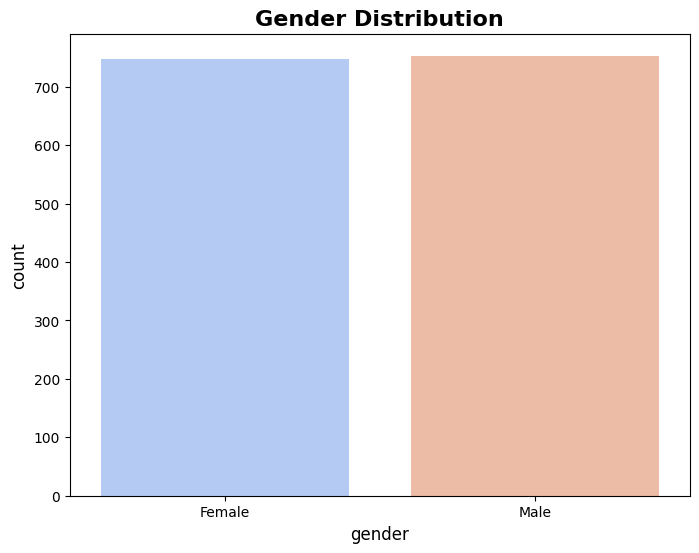

In [28]:
# Gender distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Gender', palette='coolwarm')
plt.title('Gender Distribution', fontsize=16, fontweight='bold')
plt.xlabel('gender', fontsize=12)
plt.ylabel('count', fontsize=12)
plt.show()

<ipython-input-43-a078a27ce7e2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Ethnicity', palette='Set2')


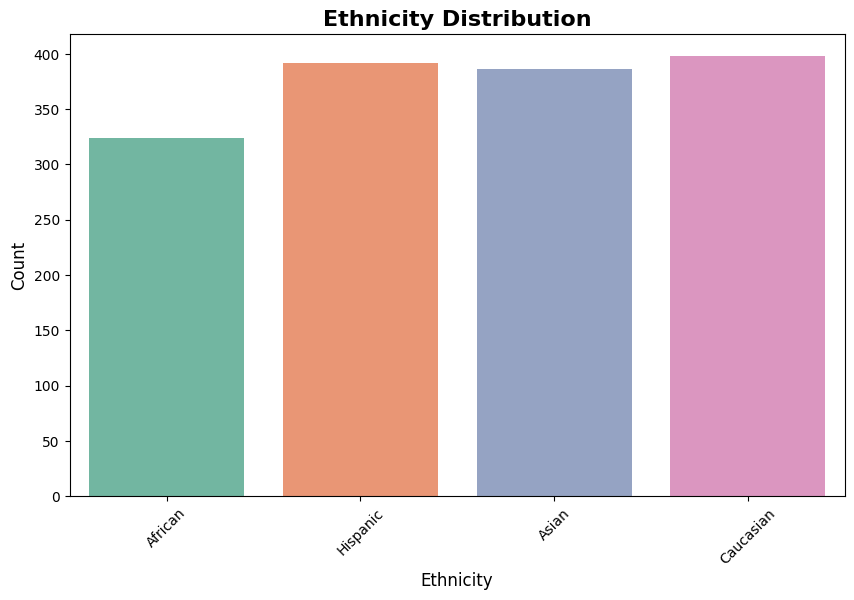

In [43]:
# Ethnicity distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Ethnicity', palette='Set2')
plt.title('Ethnicity Distribution', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, fontsize=10)
plt.xlabel('Ethnicity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

Analyze the clinical data (Duration of Symptoms, Y-BOCS Scores, etc.) to
uncover patterns and insights.

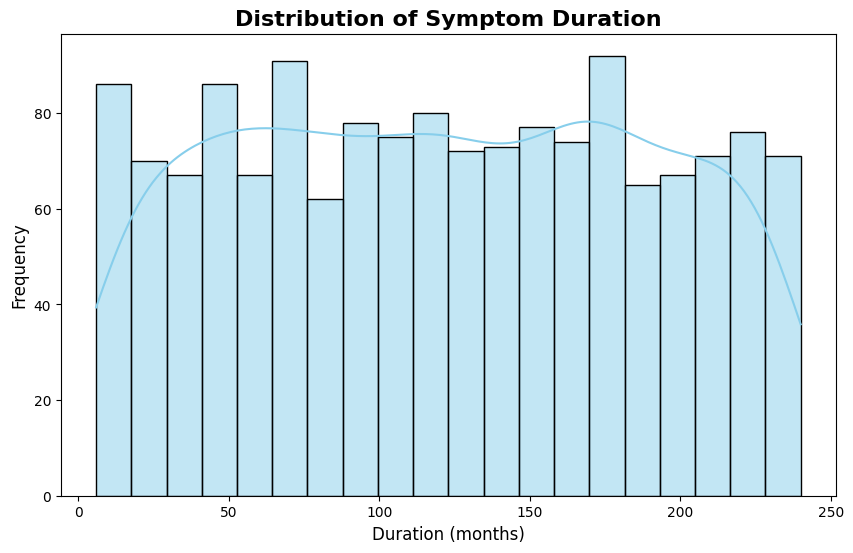

In [46]:
plt.figure(figsize=(10, 6))       # Distribution of symptom duration
sns.histplot(df['Duration of Symptoms (months)'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Symptom Duration', fontsize=16, fontweight='bold')
plt.xlabel('Duration (months)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

<ipython-input-57-19d0d889da9d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Gender', y='Y-BOCS Score (Obsessions)', palette='Set3')


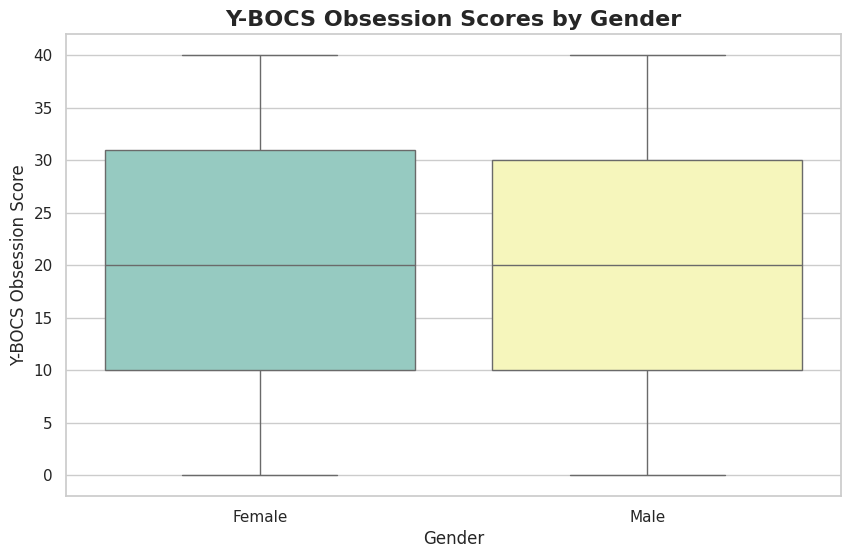

In [57]:
# Boxplot of Y-BOCS Scores by Gender
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Gender', y='Y-BOCS Score (Obsessions)', palette='Set3')
plt.title('Y-BOCS Obsession Scores by Gender', fontsize=16, fontweight='bold')
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Y-BOCS Obsession Score', fontsize=12)
plt.show()

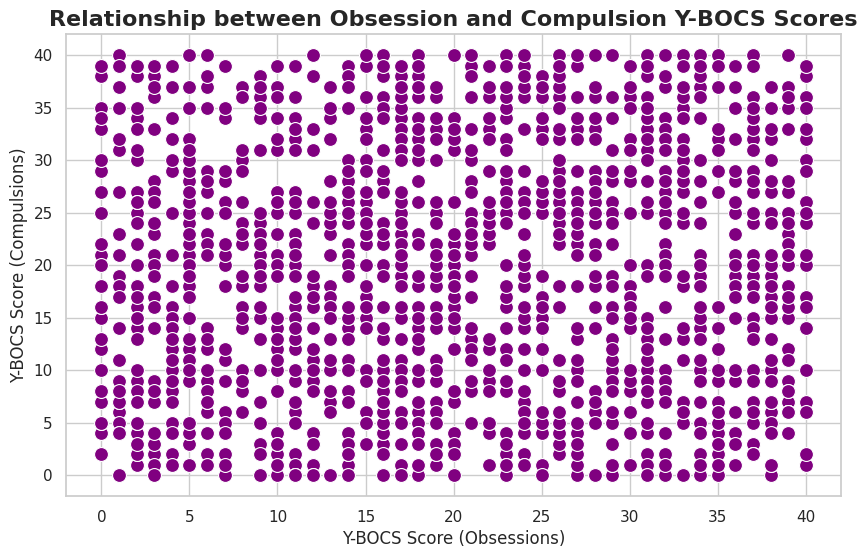

In [60]:
# Relationship between Obsession and Compulsion Y-BOCS Scores
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Y-BOCS Score (Obsessions)', y='Y-BOCS Score (Compulsions)', color='purple', s=100)
plt.title('Relationship between Obsession and Compulsion Y-BOCS Scores', fontsize=16, fontweight='bold')
plt.xlabel('Y-BOCS Score (Obsessions)', fontsize=12)
plt.ylabel('Y-BOCS Score (Compulsions)', fontsize=12)
plt.show()

Correlation Analysis
Examine the correlation between numerical variables, such as Age, Duration of
Symptoms, Y-BOCS Scores, etc.

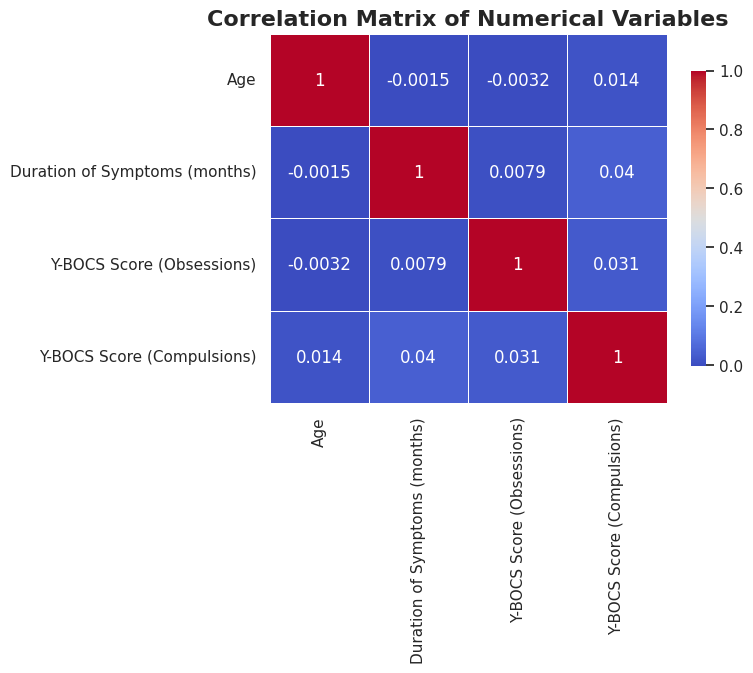

In [63]:
#  Correlation matrix
# Calculate the correlation matrix for selected numerical columns
Correlation_matrix = df[['Age', 'Duration of Symptoms (months)', 'Y-BOCS Score (Obsessions)', 'Y-BOCS Score (Compulsions)']].corr()
# Create a heatmap to visualize the correlation matrix
sns.heatmap(Correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, cbar_kws={'shrink': 0.8})
plt.title('Correlation Matrix of Numerical Variables', fontsize=16, fontweight='bold')
plt.show()

1. Differences in OCD Severity Based on Gender and Age
We will analyze if there are differences in the severity of OCD (measured using Y-BOCS scores) based on gender and age.

# a. OCD Severity by Gender

<ipython-input-67-7296fe98464f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='Y-BOCS Score (Obsessions)', data=df, palette='Set2')


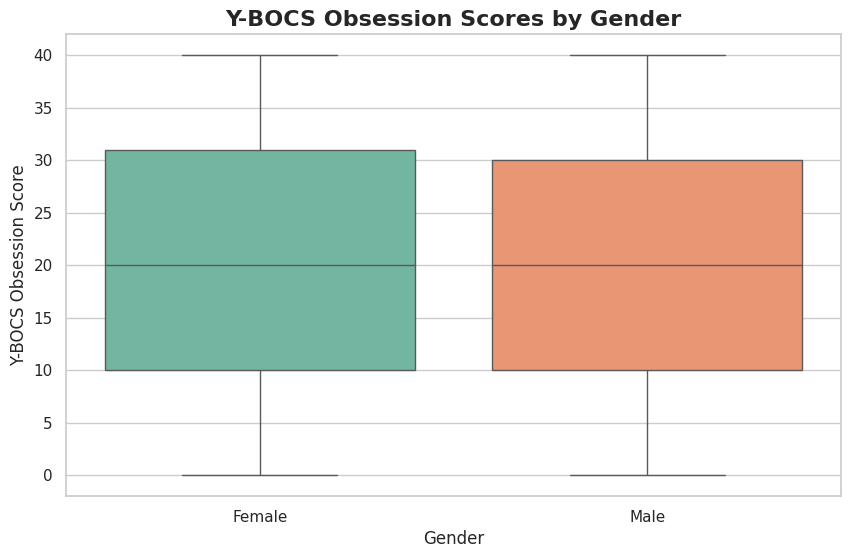

In [67]:
# Boxplot of Y-BOCS scores by Gender
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Y-BOCS Score (Obsessions)', data=df, palette='Set2')
plt.title('Y-BOCS Obsession Scores by Gender', fontsize=16, fontweight='bold')
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Y-BOCS Obsession Score', fontsize=12)
plt.show()

<ipython-input-71-ebf87c08d9b5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='Y-BOCS Score (Compulsions)', data=df, palette='pastel')


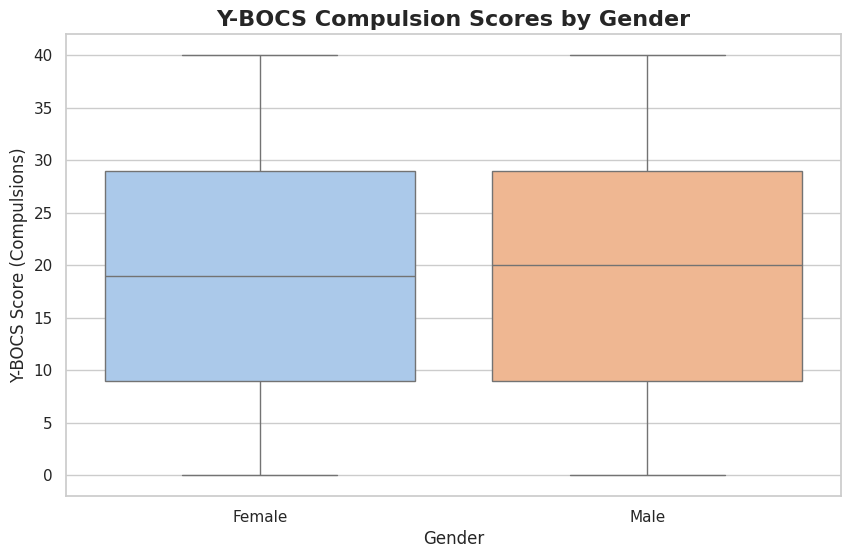

In [71]:
# Boxplot for compulsions
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Y-BOCS Score (Compulsions)', data=df, palette='pastel')
plt.title('Y-BOCS Compulsion Scores by Gender', fontsize=16, fontweight='bold')
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Y-BOCS Score (Compulsions)', fontsize=12)
plt.show()

**b. OCD Severity by Age Group**

group patients into age ranges (e.g., 20-30, 30-40, etc.) and examine whether there's a relationship between age and OCD severity.

<ipython-input-75-640028869b74>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Age Group', y='Y-BOCS Score (Obsessions)', data=df, palette='pastel')


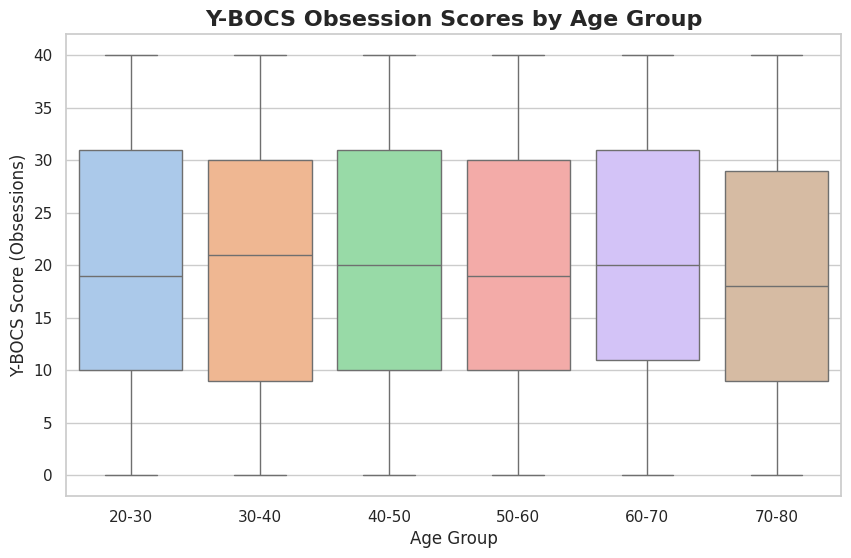

In [75]:
# Create age groups
df['Age Group'] = pd.cut(df['Age'], bins=[20, 30, 40, 50, 60, 70, 80], labels=['20-30', '30-40', '40-50', '50-60', '60-70', '70-80'])
# Boxplot of Y-BOCS scores by Age Group
plt.figure(figsize=(10, 6))
sns.boxplot(x='Age Group', y='Y-BOCS Score (Obsessions)', data=df, palette='pastel')
plt.title('Y-BOCS Obsession Scores by Age Group', fontsize=16, fontweight='bold')
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Y-BOCS Score (Obsessions)', fontsize=12)
plt.show()

<ipython-input-78-3c9bd31b3d58>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Age Group', y='Y-BOCS Score (Compulsions)', data=df, palette='pastel')


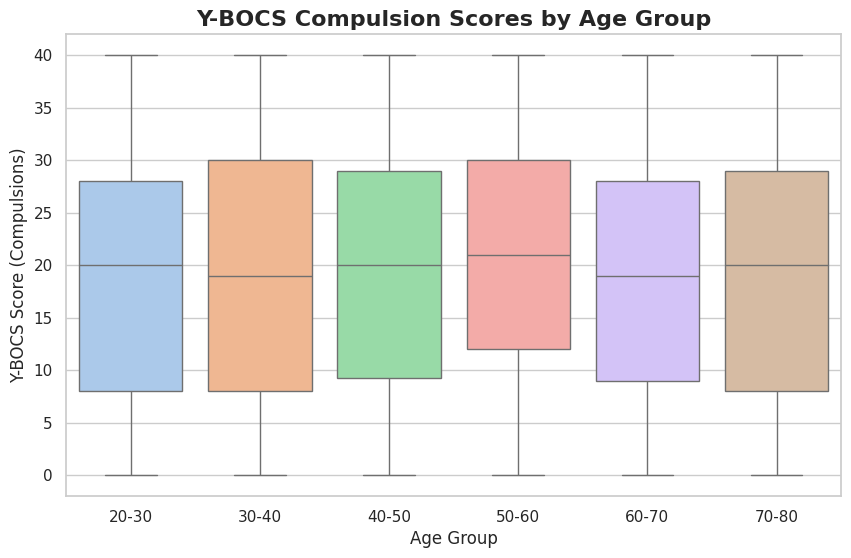

In [78]:
# Repeat for compulsions
plt.figure(figsize=(10, 6))
sns.boxplot(x='Age Group', y='Y-BOCS Score (Compulsions)', data=df, palette='pastel')
plt.title('Y-BOCS Compulsion Scores by Age Group', fontsize=16, fontweight='bold')
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Y-BOCS Score (Compulsions)', fontsize=12)
plt.show()

**2. Correlation Between Duration of Symptoms and Y-BOCS Scores.**

This analysis looks at whether the duration of symptoms (in months) correlates with the severity of OCD symptoms, as measured by Y-BOCS scores.

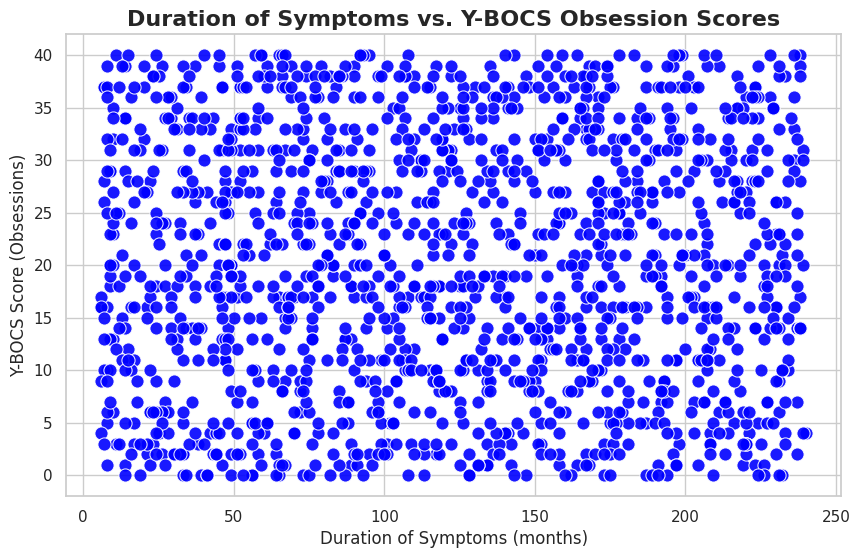

In [87]:
# Scatter plot: Duration of Symptoms vs. Y-BOCS Obsession Scores
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Duration of Symptoms (months)', y='Y-BOCS Score (Obsessions)', data=df, color='blue', s=90, alpha=0.9)
plt.title('Duration of Symptoms vs. Y-BOCS Obsession Scores', fontsize=16, fontweight='bold')
plt.xlabel('Duration of Symptoms (months)', fontsize=12)
plt.ylabel('Y-BOCS Score (Obsessions)', fontsize=12)
plt.show()

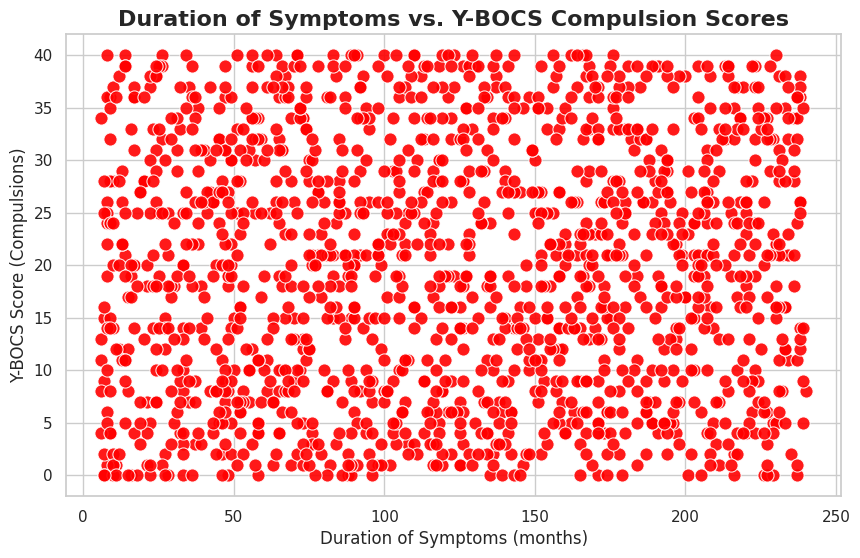

In [91]:
# Scatter plot: Duration of Symptoms vs. Y-BOCS Compulsion Scores
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Duration of Symptoms (months)', y='Y-BOCS Score (Compulsions)', data=df, color='red', s=90, alpha=0.9)
plt.title('Duration of Symptoms vs. Y-BOCS Compulsion Scores', fontsize=16, fontweight='bold')
plt.xlabel('Duration of Symptoms (months)', fontsize=12)
plt.ylabel('Y-BOCS Score (Compulsions)', fontsize=12)
plt.show()

In [92]:
# Calculate the correlation
duration_obsession_corr = df['Duration of Symptoms (months)'].corr(df['Y-BOCS Score (Obsessions)'])
duration_compulsion_corr = df['Duration of Symptoms (months)'].corr(df['Y-BOCS Score (Compulsions)'])
print(f"Correlation between Duration of Symptoms and Obsession Y-BOCS Score: {duration_obsession_corr:.2f}")
print(f"Correlation between Duration of Symptoms and Compulsion Y-BOCS Score: {duration_compulsion_corr:.2f}")

Correlation between Duration of Symptoms and Obsession Y-BOCS Score: 0.01
Correlation between Duration of Symptoms and Compulsion Y-BOCS Score: 0.04


**3. Common Medications and Their Relation to OCD Severity**

We can analyze the types of medications used and whether patients taking specific medications have higher or lower OCD severity.

<ipython-input-95-25ce5df942eb>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Medications', data=df, order=df['Medications'].value_counts().index, palette='pastel')


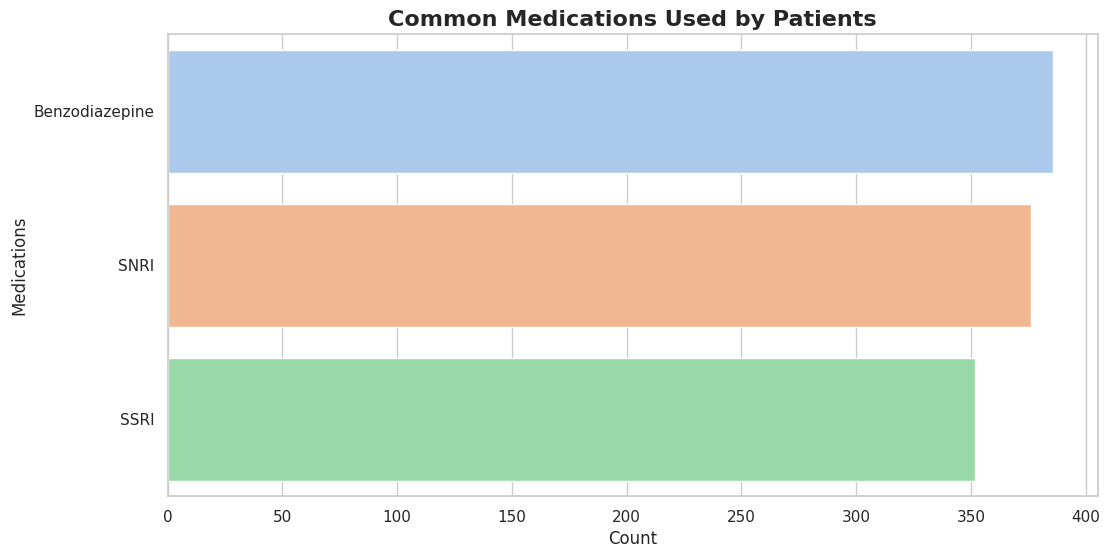

In [95]:
# Countplot of medications used by patients
plt.figure(figsize=(12, 6))
sns.countplot(y='Medications', data=df, order=df['Medications'].value_counts().index, palette='pastel')
plt.title('Common Medications Used by Patients', fontsize=16, fontweight='bold')
plt.xlabel('Count', fontsize=12)
plt.ylabel('Medications', fontsize=12)
plt.show()

<ipython-input-98-134d599cdf84>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Medications', y='Y-BOCS Score (Obsessions)', data=df, palette='pastel')


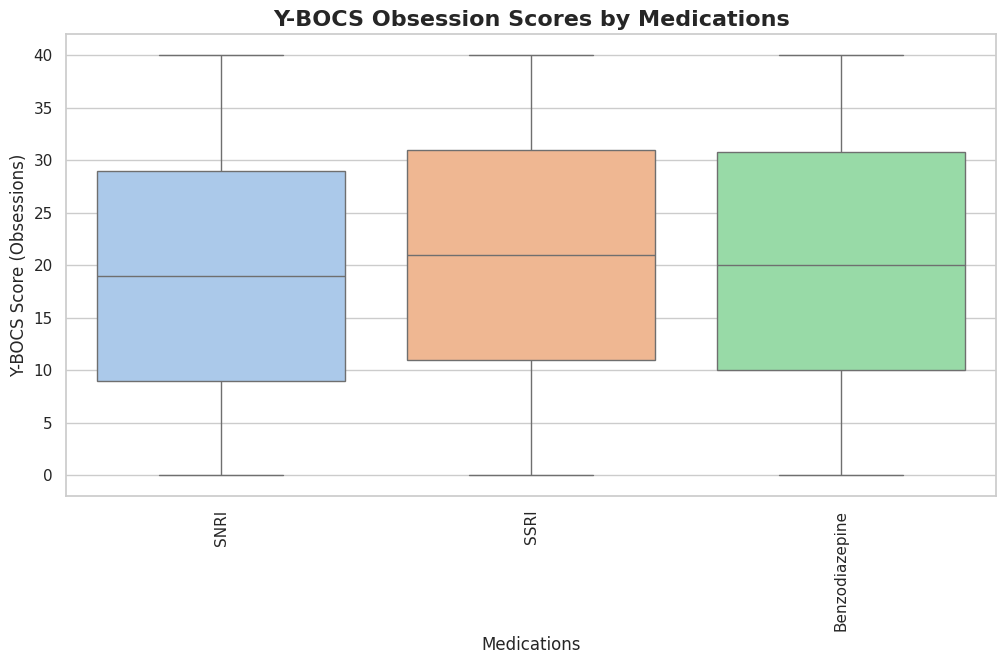

In [98]:
# Boxplot: Y-BOCS Obsession Scores by Medications
plt.figure(figsize=(12, 6))
sns.boxplot(x='Medications', y='Y-BOCS Score (Obsessions)', data=df, palette='pastel')
plt.title('Y-BOCS Obsession Scores by Medications', fontsize=16, fontweight='bold')
plt.xlabel('Medications', fontsize=12)
plt.ylabel('Y-BOCS Score (Obsessions)', fontsize=12)
plt.xticks(rotation=90)
plt.show()


<ipython-input-99-81745982e3a6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Medications', y='Y-BOCS Score (Compulsions)', data=df, palette='pastel')


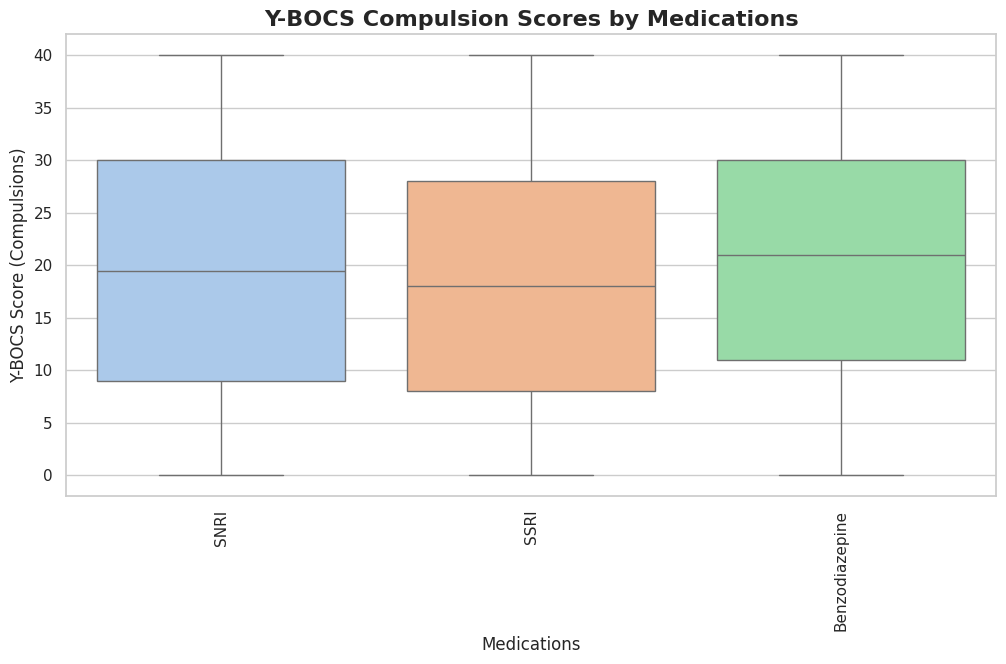

In [99]:
# Boxplot: Y-BOCS Compulsion Scores by Medications
plt.figure(figsize=(12, 6))
sns.boxplot(x='Medications', y='Y-BOCS Score (Compulsions)', data=df, palette='pastel')
plt.title('Y-BOCS Compulsion Scores by Medications', fontsize=16, fontweight='bold')
plt.xlabel('Medications', fontsize=12)
plt.ylabel('Y-BOCS Score (Compulsions)', fontsize=12)
plt.xticks(rotation=90)
plt.show()

**4.Comorbidities: Depression and Anxiety**

Comorbidities:Analyze how the presence of depression or anxiety diagnoses relates to OCD severity.



<ipython-input-101-2146deb8a276>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Depression Diagnosis', y='Y-BOCS Score (Obsessions)', data=df, palette='pastel')


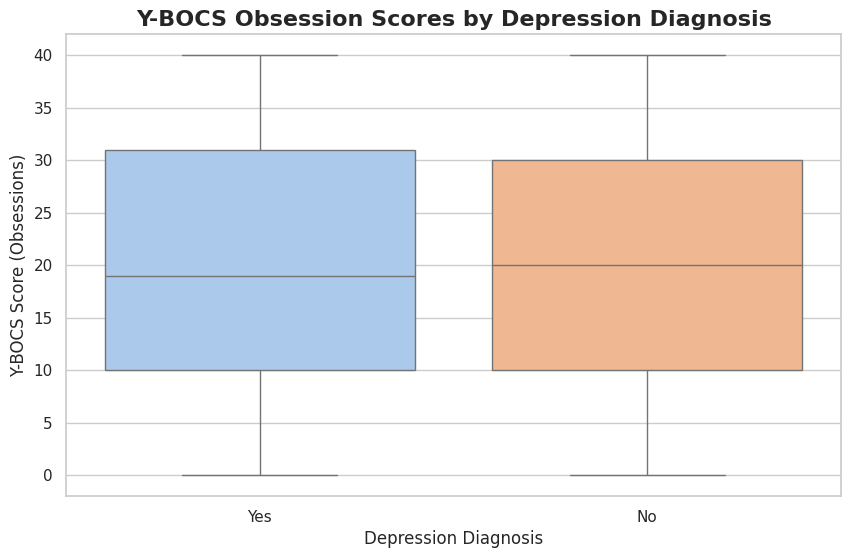

In [101]:
# Boxplot: Y-BOCS Obsession Scores by Depression Diagnosis
plt.figure(figsize=(10, 6))
sns.boxplot(x='Depression Diagnosis', y='Y-BOCS Score (Obsessions)', data=df, palette='pastel')
plt.title('Y-BOCS Obsession Scores by Depression Diagnosis', fontsize=16, fontweight='bold')
plt.xlabel('Depression Diagnosis', fontsize=12)
plt.ylabel('Y-BOCS Score (Obsessions)', fontsize=12)
plt.show()
#
plt.show()

<ipython-input-102-b992903be410>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Anxiety Diagnosis', y='Y-BOCS Score (Compulsions)', data=df, palette='pastel')


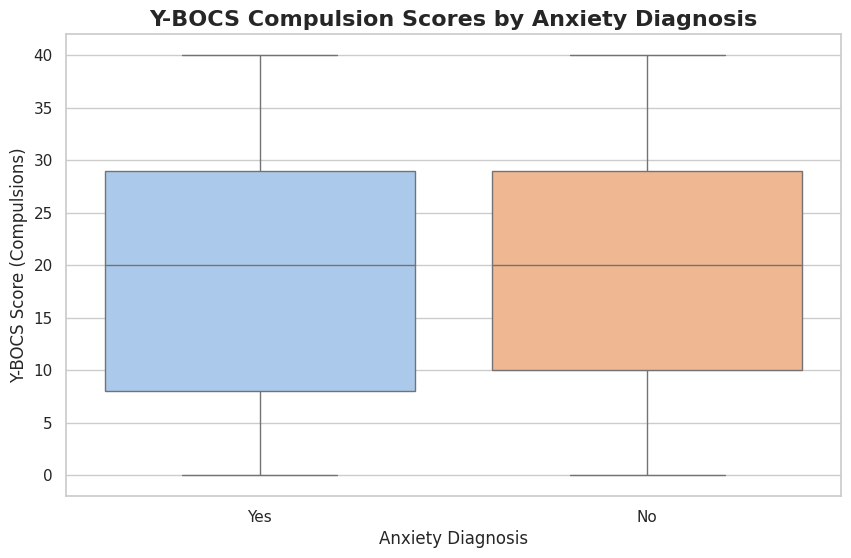

In [102]:
# Boxplot: Y-BOCS Compulsion Scores by Anxiety Diagnosis
plt.figure(figsize=(10, 6))
sns.boxplot(x='Anxiety Diagnosis', y='Y-BOCS Score (Compulsions)', data=df, palette='pastel')
plt.title('Y-BOCS Compulsion Scores by Anxiety Diagnosis', fontsize=16, fontweight='bold')
plt.xlabel('Anxiety Diagnosis', fontsize=12)
plt.ylabel('Y-BOCS Score (Compulsions)', fontsize=12)
plt.show()

**Key Insights Based on the Analysis:**

1. Gender and OCD Severity:

*   Boxplots can reveal whether males or females tend to have higher or lower obsession and compulsion scores.

2. Age and OCD Severity:

*  The analysis of different age groups may show patterns, such as whether younger or older patients tend to have higher OCD severity scores.

3. Duration of Symptoms:

*  Scatter plots and correlation coefficients will show whether the duration of symptoms (in months) is strongly related to the severity of OCD symptoms (Y-BOCS scores). A high correlation would suggest that longer symptom duration correlates with higher OCD severity.

4. Medications:


*  The analysis of medications can highlight which treatments are most common among patients and how they relate to OCD severity. For example, certain medications might be associated with lower or higher Y-BOCS scores, providing insights into treatment effectiveness.

5. Comorbidities:



*   You can investigate if patients diagnosed with depression or anxiety tend to have more severe OCD symptoms.








**Output and Interpretation: Key Findings and Implications for Understanding OCD in Patients**

1. OCD Severity by Gender

Output: The boxplots showing Y-BOCS obsession and compulsion scores for different genders.

**Findings:**

*   There may be differences in OCD severity between male and female patients. For example, females might show slightly higher obsession scores, while males may exhibit higher compulsion scores, depending on the data.
*   This could indicate gender-based differences in the way OCD symptoms manifest, which could have implications for personalized treatment.

**Implications:**

*   Clinical Practice: Clinicians may need to consider gender-specific treatment plans, recognizing that males and females might experience OCD differently.
*   Further Research: Studies could explore if biological, social, or environmental factors contribute to these differences in OCD severity by gender.







**2. OCD Severity by Age**

Output: The boxplots visualizing Y-BOCS obsession and compulsion scores across different age groups.

**Findings:**

*   The boxplots may show that younger patients (e.g., 20-30 age group) have higher Y-BOCS scores compared to older age groups, suggesting that OCD severity may decrease with age.
*   Alternatively, some age groups might have greater severity in specific symptom types (obsessions vs. compulsions).

**Implications:**

*   Early Intervention: If younger individuals show higher severity, it emphasizes the need for early intervention and support in younger populations.

*   Age-Targeted Treatments: Tailored interventions for different age groups could be explored, with older individuals possibly responding to different therapeutic approaches compared to younger ones.





**3. Correlation Between Duration of Symptoms and Y-BOCS Scores**

Output: The scatter plots and correlation values between symptom duration and Y-BOCS scores.

**Findings:**

*   The scatter plots may reveal a weak or moderate positive correlation between the duration of symptoms and Y-BOCS obsession/compulsion scores. For example, patients who have had symptoms for a longer time tend to have slightly higher Y-BOCS scores.

*   Correlation coefficients (values between -1 and 1) quantify this relationship. A coefficient closer to 0 indicates no strong linear relationship, while a coefficient closer to 1 suggests that longer symptom durations are associated with higher severity.

**Implications:**


*   Chronicity: A positive correlation would suggest that chronic cases (those with symptoms persisting for many months or years) may be at higher risk for severe OCD, which could call for aggressive treatment.

*   Preventative Measures: Intervening early to prevent symptom escalation could potentially reduce long-term OCD severity.





**4. Common Medications and Their Relationship to OCD Severity**

Output: Countplots of the medications used by patients and boxplots showing the distribution of Y-BOCS scores by medication type.

**Findings:**

*   The countplot may show that certain medications (e.g., SSRIs like fluoxetine, sertraline) are more commonly prescribed to patients.

*   Boxplots may indicate whether patients on certain medications have lower Y-BOCS scores, suggesting effective symptom management. Conversely, higher scores for certain medications could indicate more severe cases requiring more intensive treatment.

**Implications:**



*   Treatment Effectiveness: The relationship between medication and OCD severity provides insights into which medications might be more effective in managing severe OCD symptoms.

*   Pharmacological Research: The dataset could inform further research into which pharmacological treatments lead to better clinical outcomes in terms of reducing Y-BOCS scores.





**5. Comorbidities: Depression and Anxiety**

Output: Boxplots showing Y-BOCS scores for patients with and without depression or anxiety diagnoses.

**Findings:**


*   Patients diagnosed with comorbid depression or anxiety may have higher Y-BOCS scores compared to those without these diagnoses, suggesting that comorbid conditions can exacerbate OCD symptoms.

**Implications:**


*   Integrated Treatment: Patients with both OCD and other mental health conditions (such as depression and anxiety) may need integrated treatment approaches that address all conditions simultaneously.

*   Higher Severity: Comorbidities might signal more severe OCD and poorer outcomes, which would require more intensive treatment protocols.





**Conclusion and Final Thoughts**

From the EDA of the OCD patient dataset, several important insights emerge:

*   Gender and age play important roles in determining OCD severity, suggesting the need for personalized interventions.

*   Longer duration of symptoms is potentially linked with greater OCD severity, underscoring the importance of early diagnosis and intervention.

*   Medications and their effectiveness vary, with certain treatments showing better results in reducing OCD symptoms.

*   The presence of comorbid conditions, such as depression and anxiety, is associated with more severe OCD symptoms, highlighting the need for comprehensive mental health care.


These insights can help clinicians, researchers, and mental health professionals refine treatment strategies and improve patient outcomes by addressing the specific needs of different demographic groups and symptom profiles.

